In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

In [145]:
df_time = pd.read_csv("../Assets/JHU_Data_2020.02.07_PM.csv")

In [146]:
df_total = pd.read_csv("../Assets/JHU_SID_2020.02.07.csv")

In [147]:
df_total.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,2/7/2020 14:03,22112,618,867.0
1,Guangdong,Mainland China,2/7/2020 10:13,1034,1,88.0
2,Zhejiang,Mainland China,2/7/2020 11:33,1006,0,123.0
3,Henan,Mainland China,2/7/2020 14:03,914,3,86.0
4,Hunan,Mainland China,2/7/2020 11:33,772,0,112.0


In [148]:
len(df_total)

72

In [149]:
df_ctpop = pd.read_csv("../Assets/World_Bank_Population.csv")

In [150]:
df_time['Country/Region'].value_counts()

Mainland China          31
US                       6
Australia                4
Canada                   3
Germany                  1
Singapore                1
Finland                  1
United Arab Emirates     1
Vietnam                  1
Philippines              1
Belgium                  1
Malaysia                 1
India                    1
Thailand                 1
Japan                    1
Sri Lanka                1
Spain                    1
Nepal                    1
Taiwan                   1
UK                       1
Others                   1
South Korea              1
Italy                    1
France                   1
Sweden                   1
Macau                    1
Russia                   1
Hong Kong                1
Cambodia                 1
Name: Country/Region, dtype: int64

### Get Country Population Estimates

In [151]:
df_countries = df_time[(df_time['Province/State'].isnull())]
df_countries.reset_index(drop=True, inplace=True)

In [152]:
country_list = []
for i in range(len(df_countries)):
    country_list.append(df_countries['Country/Region'][i])

In [153]:
list_in = []
list_out = []
for n in country_list:
    if n in list(df_ctpop["Country Name"]):
        list_in.append(n)
    else:
        list_out.append(n)

print(list_in)
print(list_out)

['Thailand', 'Japan', 'Singapore', 'Vietnam', 'France', 'Nepal', 'Malaysia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden', 'Spain', 'Belgium']
['South Korea', 'UK', 'Russia']


In [154]:
df_time['Population'] = pd.Series()

In [155]:
for n in range(len(list_in)):
    df_time.loc[df_time['Country/Region'] == list_in[n], 'Population'] = int(df_ctpop[(df_ctpop["Country Name"] == list_in[n])]['2018'])

In [156]:
list_out_rev = ['Korea, Rep.', 'Russian Federation', 'United Kingdom']

for n in range(len(list_out)):
    df_time.loc[df_time['Country/Region'] == list_out[n], 'Population'] = int(df_ctpop[(df_ctpop["Country Name"] == list_out_rev[n])]['2018'])

In [157]:
df_time[(df_time['Province/State'].isnull())]

,Province/State,Country/Region,First confirmed date in country (Est.),Lat,Long,1/21/2020 22:00,1/22/2020 12:00,1/23/2020 12:00,1/24/2020 0:00,1/24/2020 12:00,...,2/2/2020 21:00,2/3/2020 21:00,2/4/2020 9:40,2/4/2020 22:00,2/5/2020 9:00,2/5/2020 23:00,2/6/2020 9:00,2/6/2020 14:20,2/7/2020 20:13,Population
31,NaN,Thailand,1/13/2020,13.7563,100.5018,2.0,2.0,3.0,4.0,5.0,...,19.0,19.0,19.0,25.0,25.0,25.0,25.0,25.0,25.0,6.942852e+07
32,NaN,Japan,1/16/2020,35.6762,139.6503,1.0,2.0,2.0,2.0,2.0,...,20.0,20.0,20.0,22.0,22.0,45.0,45.0,45.0,25.0,1.265291e+08
33,NaN,South Korea,1/21/2020,37.5665,126.9780,NaN,1.0,1.0,1.0,2.0,...,15.0,15.0,15.0,16.0,16.0,23.0,23.0,23.0,24.0,5.163526e+07
41,NaN,Singapore,1/23/2020,1.3521,103.8198,NaN,NaN,1.0,1.0,3.0,...,18.0,18.0,18.0,24.0,24.0,28.0,28.0,28.0,30.0,5.638676e+06
42,NaN,Vietnam,1/23/2020,21.0278,105.8342,NaN,NaN,2.0,2.0,2.0,...,6.0,8.0,8.0,8.0,8.0,10.0,10.0,10.0,10.0,9.554040e+07
43,NaN,France,1/24/2020,46.2276,2.2137,NaN,NaN,NaN,NaN,2.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.698724e+07
44,NaN,Nepal,1/25/2020,28.3949,84.1240,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.808787e+07
45,NaN,Malaysia,1/25/2020,4.2105,101.9758,NaN,NaN,NaN,NaN,NaN,...,8.0,8.0,8.0,10.0,10.0,12.0,12.0,12.0,12.0,3.152858e+07
51,NaN,Cambodia,1/27/2020,12.5657,104.9910,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.624980e+07
52,NaN,Sri Lanka,1/27/2020,7.8731,80.7718,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.167000e+07


### Get City Population Estimates

In [158]:
df_cities = df_time[(df_time['Province/State'].notnull())]
df_cities.reset_index(drop=True, inplace=True)
df_cities

,Province/State,Country/Region,First confirmed date in country (Est.),Lat,Long,1/21/2020 22:00,1/22/2020 12:00,1/23/2020 12:00,1/24/2020 0:00,1/24/2020 12:00,...,2/2/2020 21:00,2/3/2020 21:00,2/4/2020 9:40,2/4/2020 22:00,2/5/2020 9:00,2/5/2020 23:00,2/6/2020 9:00,2/6/2020 14:20,2/7/2020 20:13,Population
0,Anhui,Mainland China,1/3/2020,31.82571,117.22640,NaN,1.0,9.0,15.0,15.0,...,408.0,480.0,480.0,530.0,530.0,591.0,591.0,591.0,665.0,NaN
1,Beijing,Mainland China,1/3/2020,40.18238,116.41420,10.0,14.0,22.0,26.0,36.0,...,191.0,212.0,212.0,228.0,253.0,274.0,274.0,274.0,297.0,NaN
2,Chongqing,Mainland China,1/3/2020,30.05718,107.87400,5.0,6.0,9.0,27.0,27.0,...,300.0,337.0,337.0,366.0,376.0,389.0,400.0,400.0,415.0,NaN
3,Fujian,Mainland China,1/3/2020,26.07783,117.98950,NaN,1.0,5.0,5.0,10.0,...,159.0,179.0,179.0,194.0,205.0,215.0,215.0,215.0,224.0,NaN
4,Gansu,Mainland China,1/3/2020,36.06110,103.83430,NaN,NaN,2.0,2.0,2.0,...,51.0,55.0,55.0,57.0,57.0,62.0,62.0,62.0,67.0,NaN
5,Guangdong,Mainland China,1/3/2020,23.33841,113.42200,17.0,26.0,32.0,53.0,53.0,...,683.0,725.0,797.0,870.0,895.0,944.0,970.0,970.0,1034.0,NaN
6,Guangxi,Mainland China,1/3/2020,23.82908,108.78810,NaN,2.0,5.0,13.0,23.0,...,127.0,139.0,139.0,150.0,150.0,168.0,168.0,168.0,172.0,NaN
7,Guizhou,Mainland China,1/3/2020,26.81536,106.87480,NaN,1.0,3.0,3.0,3.0,...,46.0,56.0,56.0,64.0,64.0,69.0,71.0,71.0,81.0,NaN
8,Hainan,Mainland China,1/3/2020,19.19673,109.74550,NaN,4.0,5.0,8.0,8.0,...,71.0,79.0,79.0,91.0,91.0,100.0,106.0,106.0,117.0,NaN
9,Hebei,Mainland China,1/3/2020,38.04280,114.51490,NaN,1.0,1.0,2.0,2.0,...,113.0,126.0,126.0,135.0,135.0,157.0,157.0,157.0,172.0,NaN


In [159]:
df_cities.to_csv(r"../Assets/cities.csv")

### Initial SIR Models

In [160]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

In [161]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [162]:
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

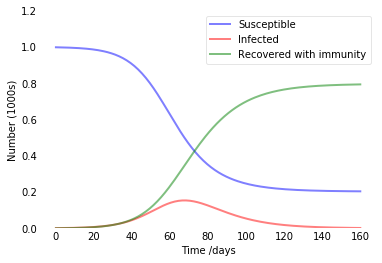

In [163]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [164]:
df_total

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,2/7/2020 14:03,22112,618,867.0
1,Guangdong,Mainland China,2/7/2020 10:13,1034,1,88.0
2,Zhejiang,Mainland China,2/7/2020 11:33,1006,0,123.0
3,Henan,Mainland China,2/7/2020 14:03,914,3,86.0
4,Hunan,Mainland China,2/7/2020 11:33,772,0,112.0
5,Anhui,Mainland China,2/7/2020 5:13,665,0,47.0
6,Jiangxi,Mainland China,2/7/2020 1:23,661,0,45.0
7,Chongqing,Mainland China,2/7/2020 12:03,415,2,31.0
8,Jiangsu,Mainland China,2/7/2020 14:03,408,0,43.0
9,Shandong,Mainland China,2/7/2020 11:33,386,0,37.0


In [165]:
df_total['Region'] = pd.Series()

In [166]:
for i in range(len(df_total)):
    if isinstance(df_total["Province/State"][i], float):
        df_total["Region"][i] = df_total["Country/Region"][i]
    else:
        df_total["Region"][i] = df_total["Province/State"][i]

C:\Users\jessb\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\jessb\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [171]:
df_total.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Region,Population
0,Hubei,Mainland China,2/7/2020 14:03,22112,618,867.0,Hubei,NaN
1,Guangdong,Mainland China,2/7/2020 10:13,1034,1,88.0,Guangdong,NaN
2,Zhejiang,Mainland China,2/7/2020 11:33,1006,0,123.0,Zhejiang,NaN
3,Henan,Mainland China,2/7/2020 14:03,914,3,86.0,Henan,NaN
4,Hunan,Mainland China,2/7/2020 11:33,772,0,112.0,Hunan,NaN


In [168]:
df_total["Population"] = pd.Series()

In [170]:
df_time.tail()

,Province/State,Country/Region,First confirmed date in country (Est.),Lat,Long,1/21/2020 22:00,1/22/2020 12:00,1/23/2020 12:00,1/24/2020 0:00,1/24/2020 12:00,...,2/2/2020 21:00,2/3/2020 21:00,2/4/2020 9:40,2/4/2020 22:00,2/5/2020 9:00,2/5/2020 23:00,2/6/2020 9:00,2/6/2020 14:20,2/7/2020 20:13,Population
64,South Australia,Australia,2/1/2020,-34.9285,138.6007,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
65,"Boston, MA",US,2/2/2020,42.3601,-71.0589,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
66,NaN,Belgium,2/4/2020,50.5039,4.4699,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,11422068.0
67,"Madison, WI",US,2/5/2020,43.0731,-89.4012,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN
68,Cruise Ship,Others,2/7/2020,35.4437,129.6380,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
for n in range(len(df_total)):
    if isinstance(df_total["Province/State"][i], float):
        df_time['Region'][n] = int(df_time.loc[df_time['Country/Region'] == df_total['Region'][n], 'Population'])
    else:
        continue

In [173]:
df_total

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Region,Population
0,Hubei,Mainland China,2/7/2020 14:03,22112,618,867.0,Hubei,NaN
1,Guangdong,Mainland China,2/7/2020 10:13,1034,1,88.0,Guangdong,NaN
2,Zhejiang,Mainland China,2/7/2020 11:33,1006,0,123.0,Zhejiang,NaN
3,Henan,Mainland China,2/7/2020 14:03,914,3,86.0,Henan,NaN
4,Hunan,Mainland China,2/7/2020 11:33,772,0,112.0,Hunan,NaN
5,Anhui,Mainland China,2/7/2020 5:13,665,0,47.0,Anhui,NaN
6,Jiangxi,Mainland China,2/7/2020 1:23,661,0,45.0,Jiangxi,NaN
7,Chongqing,Mainland China,2/7/2020 12:03,415,2,31.0,Chongqing,NaN
8,Jiangsu,Mainland China,2/7/2020 14:03,408,0,43.0,Jiangsu,NaN
9,Shandong,Mainland China,2/7/2020 11:33,386,0,37.0,Shandong,NaN
